In [ ]:
from google.colab import drive
import pandas as pd

# Google Drive'ı bağlayalım
drive.mount('/content/drive')

# Dosya yolunu okuyalım
file_path = '/content/drive/MyDrive/player/all_fifa_players.csv'
df = pd.read_csv(file_path)

# İlk 5 satırı görüntüleyelim
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Player,Position,League,Contract Start,Contract End,Age,Overall Score,Potential Score,Player ID,Height,...,International Reputation,Body Type,Real Face,Pace/Diving,Shooting/Handling,Passing/Kicking,Dribbling/Reflexes,Defending/Pace,Physical/Positioning,Source_File
0,Luis Miguel Afonso Fernandes,"CM, RM, CAM, CAM",1. Division (Cyprus),2024.0,2025,34,75,75,197965,"177cm / 5'10""",...,3,Normal (170-185),Yes,58,72,77,76,61,58,combined_fifa_players_20241112_163726
1,Marcos Vinícius Sousa Natividade,"LM, LW, CAM, LM",1. Division (Cyprus),2022.0,2028,27,74+1,74+1,270478,"174cm / 5'9""",...,1,Lean (170-185),No,85,69,67,74,26,59,combined_fifa_players_20241112_163726
2,Vid Belec,"GK, GK",1. Division (Cyprus),2022.0,2027,34,73,73,193336,"193cm / 6'4""",...,1,Normal (185+),No,72,71,69,76,48,73,combined_fifa_players_20241112_163726
3,Youssef El Arabi,"ST, ST",1. Division (Cyprus),2024.0,2026,37,73,73,194209,"182cm / 6'0""",...,1,Normal (170-185),No,59,76,65,72,37,64,combined_fifa_players_20241112_163726
4,Max Meyer,"CAM, CM, CAM",1. Division (Cyprus),2024.0,2026,28,72,72,212150,"173cm / 5'8""",...,1,Normal (170-185),Yes,62,66,74,75,61,62,combined_fifa_players_20241112_163726


In [ ]:
# Sütun isimlerini görelim
print(df.columns)

# Eksik veri kontrolü
print(df.isnull().sum())


Index(['Player', 'Position', 'League', 'Contract Start', 'Contract End', 'Age',
       'Overall Score', 'Potential Score', 'Player ID', 'Height', 'Weight',
       'Preferred Foot', 'Best Overall', 'Best Position', 'Growth',
       'Joined Team', 'Loan End', 'Value', 'Wage', 'Release Clause',
       'Total Attacking Score', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Total Skill', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Total Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Total Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Total Mentality', 'Aggression', 'Interceptions',
       'Attack Position', 'Vision', 'Penalties', 'Composure',
       'Total Defending', 'Defensive Awareness', 'Standing Tackle',
       'Sliding tackle', 'Total Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats'

In [ ]:
# Gereksiz sütunları çıkaralım
df = df.drop(['Player', 'Player ID', 'Source_File', 'Real Face', 'Body Type', 'Contract Start'], axis=1)

# Yeni veri yapısını kontrol edelim
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37158 entries, 0 to 37157
Data columns (total 71 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Position                  37158 non-null  object 
 1   League                    37158 non-null  object 
 2   Contract End              37158 non-null  object 
 3   Age                       37158 non-null  int64  
 4   Overall Score             37158 non-null  object 
 5   Potential Score           37158 non-null  object 
 6   Height                    37158 non-null  object 
 7   Weight                    37158 non-null  object 
 8   Preferred Foot            37158 non-null  object 
 9   Best Overall              37158 non-null  int64  
 10  Best Position             37158 non-null  object 
 11  Growth                    37158 non-null  int64  
 12  Joined Team               37158 non-null  object 
 13  Loan End                  2384 non-null   object 
 14  Value 

In [ ]:
df.drop(['Attacking Work Rate', 'Defensive Work Rate'], axis=1, inplace=True)


In [ ]:
numeric_columns = df.columns[df.dtypes == 'object']
print(numeric_columns)


Index(['Position', 'League', 'Contract End', 'Overall Score',
       'Potential Score', 'Height', 'Weight', 'Preferred Foot',
       'Best Position', 'Joined Team', 'Loan End', 'Value', 'Wage',
       'Release Clause', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Dribbling', 'Curve', 'FK Accuracy',
       'Long Passing', 'Ball Control', 'Acceleration', 'Sprint Speed',
       'Agility', 'Reactions', 'Balance', 'Shot Power', 'Jumping', 'Stamina',
       'Strength', 'Long Shots', 'Aggression', 'Interceptions',
       'Attack Position', 'Vision', 'Penalties', 'Composure',
       'Defensive Awareness', 'Standing Tackle', 'Sliding tackle', 'GK Diving',
       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes'],
      dtype='object')


In [ ]:
def convert_currency(value):
    if 'M' in value:
        return float(value.replace('€','').replace('M','')) * 1_000_000
    elif 'K' in value:
        return float(value.replace('€','').replace('K','')) * 1_000
    else:
        return float(value.replace('€',''))

df['Value'] = df['Value'].apply(convert_currency)
df['Wage'] = df['Wage'].apply(convert_currency)
df['Release Clause'] = df['Release Clause'].apply(convert_currency)


In [ ]:
columns_to_convert = ['Overall Score', 'Potential Score', 'Crossing', 'Finishing', 'Heading Accuracy',
                      'Short Passing', 'Volleys', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
                      'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Shot Power', 'Jumping',
                      'Stamina', 'Strength', 'Long Shots', 'Aggression', 'Interceptions', 'Attack Position',
                      'Vision', 'Penalties', 'Composure', 'Defensive Awareness', 'Standing Tackle', 'Sliding tackle',
                      'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']

for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [ ]:
def convert_height(height):
    if 'cm' in height:
        # Eğer veri zaten cm cinsindeyse, sadece sayıyı al
        return float(height.replace('cm', '').split('/')[0].strip())
    else:
        # Feet ve inç formatındaysa, dönüştür
        feet, inches = height.split("'")
        return round(int(feet) * 30.48 + int(inches) * 2.54)

df['Height'] = df['Height'].apply(convert_height)



In [ ]:
def convert_weight(weight):
    # İlk kısmı (kg cinsinden olanı) al
    return float(weight.split('kg')[0].strip())

df['Weight'] = df['Weight'].apply(convert_weight)


In [ ]:
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37158 entries, 0 to 37157
Data columns (total 69 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Position                  37158 non-null  object 
 1   League                    37158 non-null  object 
 2   Contract End              37158 non-null  object 
 3   Age                       37158 non-null  int64  
 4   Overall Score             35374 non-null  float64
 5   Potential Score           34936 non-null  float64
 6   Height                    37158 non-null  float64
 7   Weight                    37158 non-null  float64
 8   Preferred Foot            37158 non-null  object 
 9   Best Overall              37158 non-null  int64  
 10  Best Position             37158 non-null  object 
 11  Growth                    37158 non-null  int64  
 12  Joined Team               37158 non-null  object 
 13  Loan End                  2384 non-null   object 
 14  Value 

In [ ]:
# Eksik verileri saydırma
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
print(missing_data)

Loan End               34774
Potential Score         2222
Overall Score           1784
Jumping                 1200
Ball Control            1170
Reactions               1060
Dribbling               1040
Short Passing            984
Stamina                  808
Vision                   792
Standing Tackle          786
Attack Position          768
Finishing                764
Interceptions            758
Acceleration             726
Long Passing             718
Sprint Speed             690
Defensive Awareness      684
Crossing                 628
Strength                 610
Sliding tackle           574
Composure                554
Shot Power               552
Agility                  536
Aggression               514
Heading Accuracy         506
Long Shots               498
Curve                    348
Balance                  314
Volleys                  276
FK Accuracy              204
Penalties                160
GK Diving                134
GK Reflexes              130
GK Handling   

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Loan End sütununu çıkarma
df = df.drop(columns=['Loan End'])

# Sayısal ve kategorik sütunları ayırma
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Sayısal verileri ortalama ile doldurma
num_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

# Kategorik verileri mod ile doldurma
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

print("Eksik veriler dolduruldu ve Loan End sütunu çıkarıldı.")


Eksik veriler dolduruldu ve Loan End sütunu çıkarıldı.


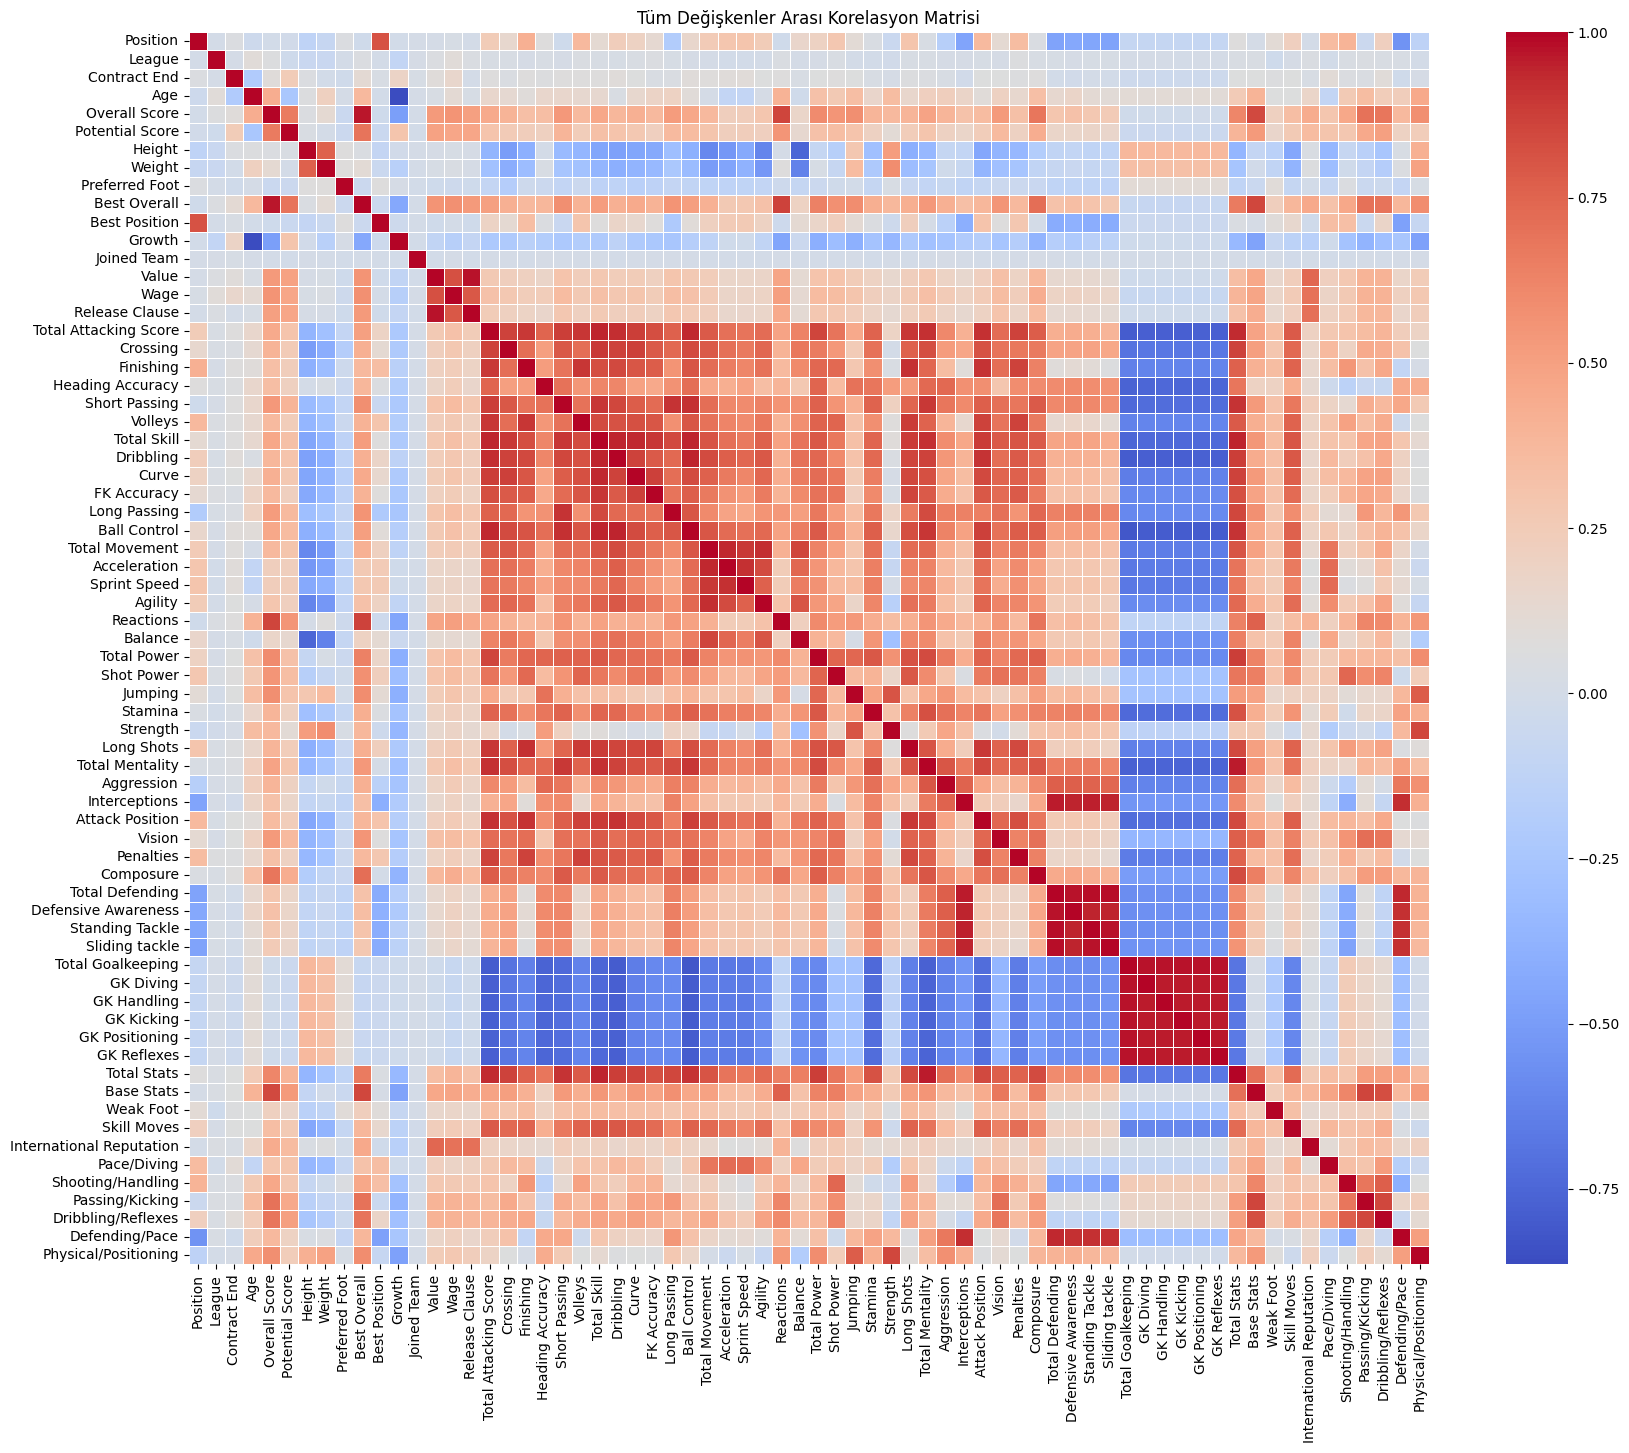

In [ ]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# 'Loan End' sütununu çıkar
df = df.drop(columns=['Loan End'], errors='ignore')

# Kategorik sütunları etiketleyelim
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Korelasyon matrisi
corr_matrix = df.corr()

# Görselleştirme
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Tüm Değişkenler Arası Korelasyon Matrisi")
plt.show()


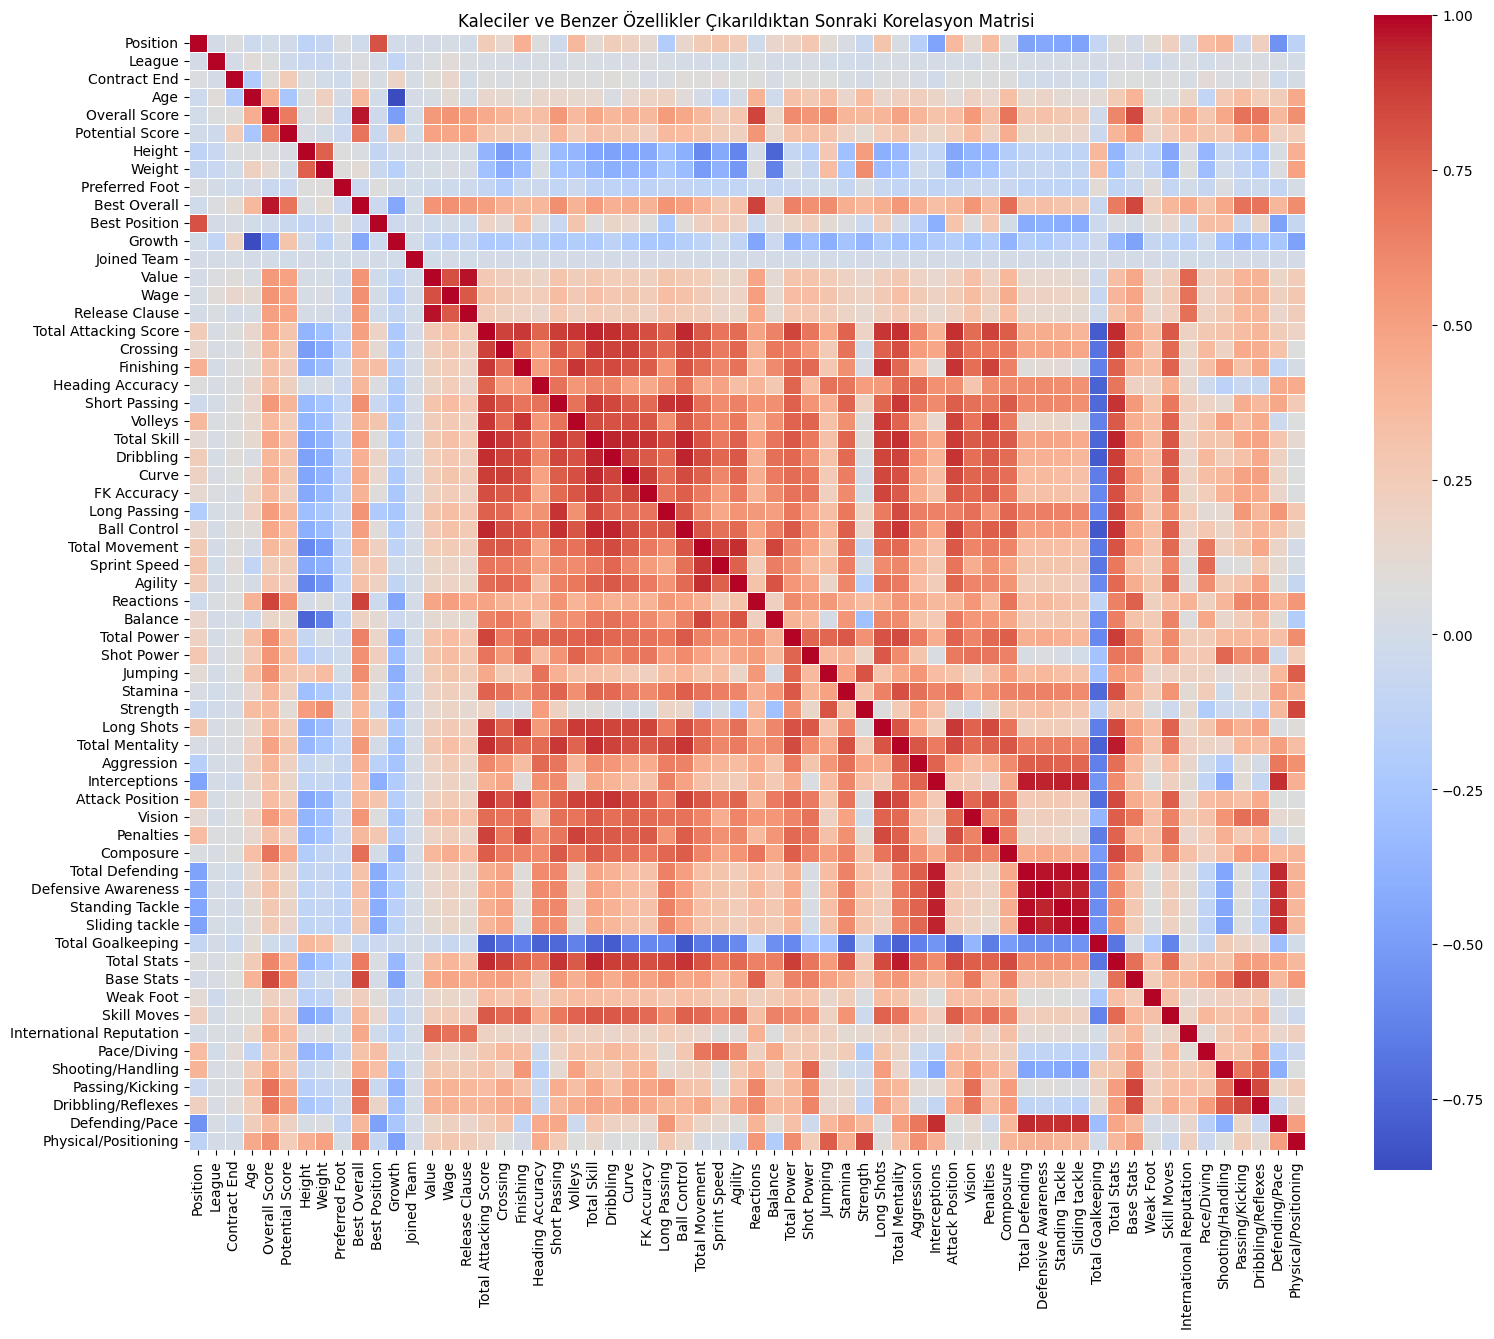

In [ ]:
# Kalecileri çıkar
df = df[df['Position'] != 'GK']

# Kaleciye özel tüm özellikleri çıkar
gk_features = [col for col in df.columns if 'GK' in col]
df = df.drop(columns=gk_features)

# Daha önce belirttiğimiz benzer ve gereksiz özellikleri çıkar
columns_to_drop = [
    'Acceleration',  # Sprint Speed kalsın
    'Sliding Tackle'
]

# Sadece var olan sütunları sil
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

df = df.drop(columns=columns_to_drop)


# Korelasyon matrisi oluştur
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Korelasyonları görselleştir
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Kaleciler ve Benzer Özellikler Çıkarıldıktan Sonraki Korelasyon Matrisi')
plt.show()


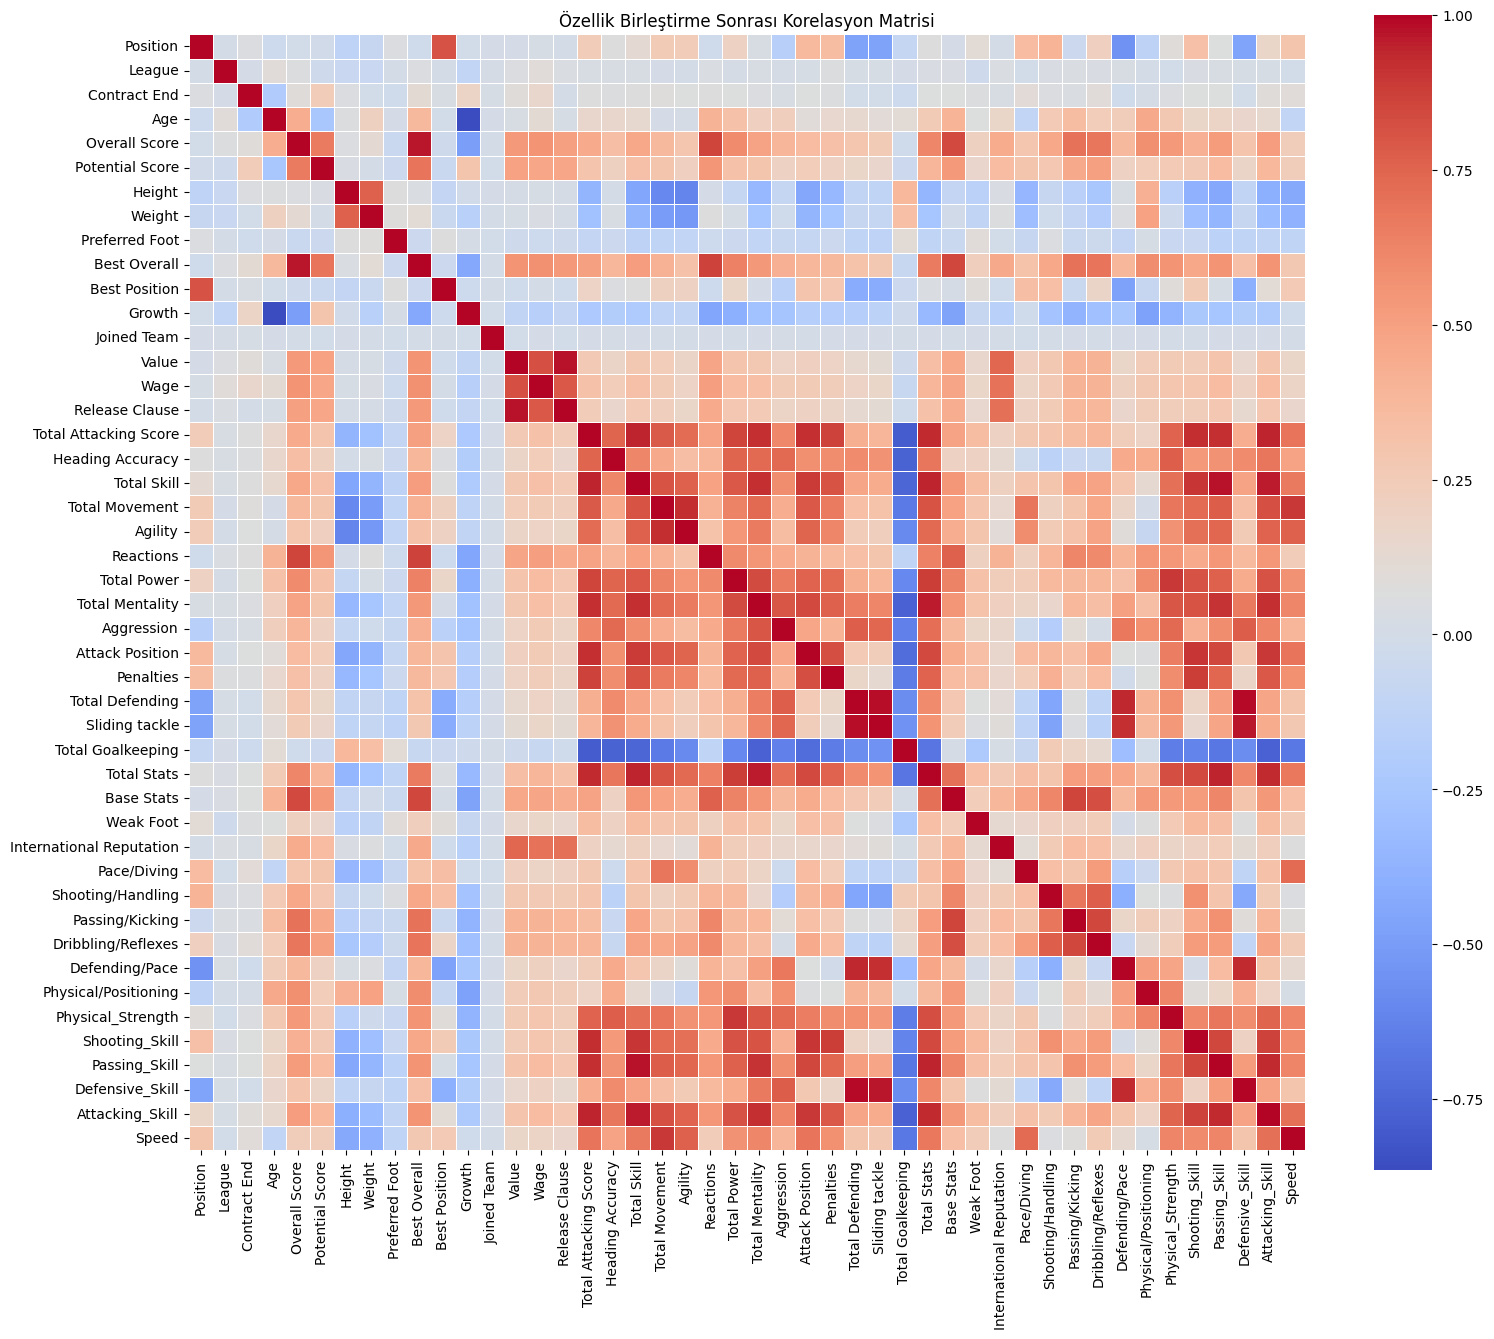

In [ ]:
# 1. Fiziksel Güç (Strength, Stamina, Jumping, Balance)
physical_cols = [col for col in ["Strength", "Stamina", "Jumping", "Balance"] if col in df.columns]
df["Physical_Strength"] = df[physical_cols].mean(axis=1)

# 2. Şut Yeteneği (Finishing, Shot Power, Long Shots, Volleys, FK Accuracy)
shooting_cols = [col for col in ["Finishing", "Shot Power", "Long Shots", "Volleys", "FK Accuracy"] if col in df.columns]
df["Shooting_Skill"] = df[shooting_cols].mean(axis=1)

# 3. Pas Yeteneği (Short Passing, Long Passing, Vision, Curve, Crossing)
passing_cols = [col for col in ["Short Passing", "Long Passing", "Vision", "Curve", "Crossing"] if col in df.columns]
df["Passing_Skill"] = df[passing_cols].mean(axis=1)

# 4. Savunma Yeteneği (Defensive Awareness, Standing Tackle, Interceptions, Sliding Tackle)
defense_cols = [col for col in ["Defensive Awareness", "Standing Tackle", "Interceptions", "Sliding Tackle"] if col in df.columns]
df["Defensive_Skill"] = df[defense_cols].mean(axis=1)

# 5. Hücum Zekası (Dribbling, Composure, Ball Control, Skill Moves)
attacking_cols = [col for col in ["Dribbling", "Composure", "Ball Control", "Skill Moves"] if col in df.columns]
df["Attacking_Skill"] = df[attacking_cols].mean(axis=1)

# 6. Hız Yeteneği (Sprint Speed, Acceleration)
speed_cols = [col for col in ["Sprint Speed", "Acceleration"] if col in df.columns]
df["Speed"] = df[speed_cols].mean(axis=1)

# Kullanılan sütunları silelim
columns_to_drop = physical_cols + shooting_cols + passing_cols + defense_cols + attacking_cols + speed_cols
df = df.drop(columns=columns_to_drop)

# Yeni özelliklerle korelasyon matrisi çizelim
plt.figure(figsize=(18, 15))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Özellik Birleştirme Sonrası Korelasyon Matrisi')
plt.show()


In [ ]:
# 1. Mevkilere göre ortalama özellikleri hesapla
position_means = df.groupby("Best Position").mean()

# 2. Her oyuncunun kendi mevki ortalamasından farkını hesapla
df_diff = df.copy()
for col in position_means.columns:
    df_diff[col + "_diff"] = df[col] - df["Best Position"].map(position_means[col])

# 3. Sonuçları kontrol edelim
df_diff.head()



,Position,League,Contract End,Age,Overall Score,Potential Score,Height,Weight,Preferred Foot,Best Overall,...,Passing/Kicking_diff,Dribbling/Reflexes_diff,Defending/Pace_diff,Physical/Positioning_diff,Physical_Strength_diff,Shooting_Skill_diff,Passing_Skill_diff,Defensive_Skill_diff,Attacking_Skill_diff,Speed_diff
0,413,0,1,34.0,75.000000,75.000000,177.0,69.0,1,76.0,...,13.837392,7.730087,15.387536,0.901775,-4.298500,14.926703,15.311407,19.207407,11.417611,-6.887808
1,622,0,4,27.0,65.548256,70.849038,174.0,65.0,1,74.0,...,5.716247,6.113272,-17.348970,-0.347826,0.789154,1.145597,2.681462,-19.873558,4.743136,8.391070
2,451,0,3,34.0,73.000000,73.000000,193.0,84.0,1,73.0,...,7.151688,10.568236,13.297670,10.120304,-2.350925,1.988052,1.390467,3.306071,8.679534,6.931267
3,1304,0,2,37.0,73.000000,73.000000,182.0,84.0,1,73.0,...,11.787365,8.298151,6.335516,-1.888290,-3.210620,14.882640,12.673959,5.789315,7.264550,-10.080351
4,12,0,2,28.0,72.000000,72.000000,173.0,68.0,1,72.0,...,10.837392,6.730087,15.387536,4.901775,4.201500,8.326703,12.511407,19.207407,6.917611,-15.887808


In [ ]:
# "_diff" ile biten sütunları al ve df'ye ekle
diff_columns = [col for col in df_diff.columns if "_diff" in col]
df[diff_columns] = df_diff[diff_columns]

# Sütunları tekrar kontrol edelim
print([col for col in df.columns if "diff" in col.lower()])


['Position_diff', 'League_diff', 'Contract End_diff', 'Age_diff', 'Overall Score_diff', 'Potential Score_diff', 'Height_diff', 'Weight_diff', 'Preferred Foot_diff', 'Best Overall_diff', 'Growth_diff', 'Joined Team_diff', 'Value_diff', 'Wage_diff', 'Release Clause_diff', 'Total Attacking Score_diff', 'Heading Accuracy_diff', 'Total Skill_diff', 'Total Movement_diff', 'Agility_diff', 'Reactions_diff', 'Total Power_diff', 'Total Mentality_diff', 'Aggression_diff', 'Attack Position_diff', 'Penalties_diff', 'Total Defending_diff', 'Sliding tackle_diff', 'Total Goalkeeping_diff', 'Total Stats_diff', 'Base Stats_diff', 'Weak Foot_diff', 'International Reputation_diff', 'Pace/Diving_diff', 'Shooting/Handling_diff', 'Passing/Kicking_diff', 'Dribbling/Reflexes_diff', 'Defending/Pace_diff', 'Physical/Positioning_diff', 'Physical_Strength_diff', 'Shooting_Skill_diff', 'Passing_Skill_diff', 'Defensive_Skill_diff', 'Attacking_Skill_diff', 'Speed_diff']


In [ ]:
# 1. Kullanışsız sütunları belirleyelim
excluded_columns = [
    "Wage_diff", "Release Clause_diff", "Joined Team_diff", "Value_diff", "Contract End_diff",
    "Overall Score_diff", "Potential Score_diff", "Height_diff", "Weight_diff", "Preferred Foot_diff"
]

# 2. Kullanışsız sütunları çıkartarak sadece beceri ile ilgili fark sütunlarını alalım
diff_columns_filtered = [col for col in df.columns if col.endswith("_diff") and col not in excluded_columns]

# 3. Güncellenmiş beceri sütunları ile en iyi 3 özelliği tekrar hesaplayalım
df["Top_3_Skills"] = df[diff_columns_filtered].apply(lambda x: x.nlargest(3).index.tolist(), axis=1)

# 4. Sonuçları inceleyelim
df[["Position", "Top_3_Skills"]].head()



,Position,Top_3_Skills
0,413,"[Total Stats_diff, Total Mentality_diff, Total..."
1,622,"[Total Stats_diff, Total Skill_diff, Total Att..."
2,451,"[Total Stats_diff, Base Stats_diff, Total Move..."
3,1304,"[Total Stats_diff, Position_diff, Total Skill_..."
4,12,"[Total Stats_diff, Total Mentality_diff, Total..."


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


from matplotlib import pyplot as plt
_df_0['Position'].plot(kind='hist', bins=20, title='Position')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Position'].plot(kind='line', figsize=(8, 4), title='Position')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# 1. Genel ve toplam skorları içeren sütunları belirleyelim
excluded_columns += [
    "Total Stats_diff", "Base Stats_diff", "Total Skill_diff", "Total Attacking Score_diff",
    "Total Mentality_diff", "Total Movement_diff", "Total Power_diff", "Total Defending_diff",
    "Total Goalkeeping_diff", "Position_diff"
]

# 2. Sadece becerileri içeren fark sütunlarını filtreleyelim
diff_columns_filtered = [col for col in df.columns if col.endswith("_diff") and col not in excluded_columns]

# 3. Güncellenmiş beceri sütunları ile en iyi 3 özelliği tekrar hesaplayalım
df["Top_3_Skills"] = df[diff_columns_filtered].apply(lambda x: x.nlargest(3).index.tolist(), axis=1)

# 4. Sonuçları inceleyelim
df[["Position", "Top_3_Skills"]].head()


SyntaxError: unterminated string literal (detected at line 6) (<ipython-input-55-de00dec33e61>, line 6)

In [ ]:
from scipy.stats import zscore

# Anomali tespiti için sadece diff sütunlarını seçelim
diff_columns = [col for col in df.columns if "_diff" in col]

# Z-Score hesaplayalım
df["Z_Score"] = df[diff_columns].apply(zscore, axis=1).abs().max(axis=1)

# Z-Score'u 2.5'ten büyük olanları anormal olarak işaretleyelim
df["Anomaly"] = df["Z_Score"] > 2.5

# Anormal oyuncuları görelim
df[df["Anomaly"]].head()


,Position,League,Contract End,Age,Overall Score,Potential Score,Height,Weight,Preferred Foot,Best Overall,...,Physical_Strength_diff,Shooting_Skill_diff,Passing_Skill_diff,Defensive_Skill_diff,Attacking_Skill_diff,Speed_diff,Top_3_Skills,Z_Score,Anomaly,Suggested_Position
0,413,0,1,34.0,75.000000,75.000000,177.0,69.0,1,76.0,...,-4.298500,14.926703,15.311407,19.207407,11.417611,-6.887808,"[Penalties_diff, Defensive_Skill_diff, Attack ...",4.912399,True,2
1,622,0,4,27.0,65.548256,70.849038,174.0,65.0,1,74.0,...,0.789154,1.145597,2.681462,-19.873558,4.743136,8.391070,"[Aggression_diff, Heading Accuracy_diff, Shoot...",6.287690,True,2
2,451,0,3,34.0,73.000000,73.000000,193.0,84.0,1,73.0,...,-2.350925,1.988052,1.390467,3.306071,8.679534,6.931267,"[Agility_diff, Defending/Pace_diff, Reactions_...",5.580270,True,4
3,1304,0,2,37.0,73.000000,73.000000,182.0,84.0,1,73.0,...,-3.210620,14.882640,12.673959,5.789315,7.264550,-10.080351,"[Penalties_diff, Sliding tackle_diff, Shooting...",5.392034,True,10
4,12,0,2,28.0,72.000000,72.000000,173.0,68.0,1,72.0,...,4.201500,8.326703,12.511407,19.207407,6.917611,-15.887808,"[Defensive_Skill_diff, Sliding tackle_diff, Ag...",4.765731,True,2


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Sadece anormal oyuncuları al
anomalous_players = df[df["Anomaly"]]

# 2. Kullanılacak sütunları belirle (_diff olanları seç)
diff_columns = [col for col in df.columns if "_diff" in col]

# 3. Eğitim verisini oluştur
X = anomalous_players[diff_columns]  # Özellikler
y = anomalous_players["Suggested_Position"]  # Hedef değişken

# 4. Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Veriyi ölçeklendir
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. KNN modelini eğit
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# 7. Test seti doğruluğunu kontrol et
accuracy = knn.score(X_test_scaled, y_test)
print(f"KNN Model Accuracy: {accuracy:.2f}")

# 8. Yeni oyuncular için mevki tahmini yap
df["Predicted_Position"] = knn.predict(scaler.transform(df[diff_columns]))

# 9. Tahminleri inceleyelim
df[["Best Position", "Suggested_Position", "Predicted_Position"]].head(10)


KNN Model Accuracy: 0.46


,Best Position,Suggested_Position,Predicted_Position
0,0,2,8
1,7,2,2
2,5,4,4
3,14,10,10
4,0,2,2
5,1,4,4
6,1,8,3
7,2,3,3
8,11,2,2
9,10,4,4


In [ ]:
from sklearn.model_selection import GridSearchCV

# K değerleri için adaylar
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 15]}

# GridSearchCV ile en iyi K'yi bul
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# En iyi k değerini yazdıralım
best_k = grid_search.best_params_['n_neighbors']
print(f"Best k: {best_k}")

# En iyi k ile modeli tekrar eğitelim
knn_optimized = KNeighborsClassifier(n_neighbors=best_k)
knn_optimized.fit(X_train_scaled, y_train)

# Yeni doğruluk skoru
accuracy_optimized = knn_optimized.score(X_test_scaled, y_test)
print(f"Optimized KNN Model Accuracy: {accuracy_optimized:.2f}")


Best k: 1
Optimized KNN Model Accuracy: 0.88


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Random Forest ile önemli özellikleri bulalım
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Özellik önemlerini alalım
feature_importance = rf.feature_importances_
important_features = np.array(diff_columns)[np.argsort(feature_importance)[::-1]][:10]  # En önemli 10 özellik

print("Most important features:", important_features)

# Modeli sadece önemli özelliklerle tekrar eğitelim
X_train_imp = X_train[important_features]
X_test_imp = X_test[important_features]

scaler_imp = StandardScaler()
X_train_scaled_imp = scaler_imp.fit_transform(X_train_imp)
X_test_scaled_imp = scaler_imp.transform(X_test_imp)

knn_imp = KNeighborsClassifier(n_neighbors=best_k)
knn_imp.fit(X_train_scaled_imp, y_train)

accuracy_imp = knn_imp.score(X_test_scaled_imp, y_test)
print(f"KNN with Important Features Accuracy: {accuracy_imp:.2f}")


Most important features: ['Speed_diff' 'Aggression_diff' 'Attack Position_diff' 'Agility_diff'
 'Defensive_Skill_diff' 'Penalties_diff' 'Pace/Diving_diff' 'League_diff'
 'Reactions_diff' 'Total Defending_diff']
KNN with Important Features Accuracy: 0.88


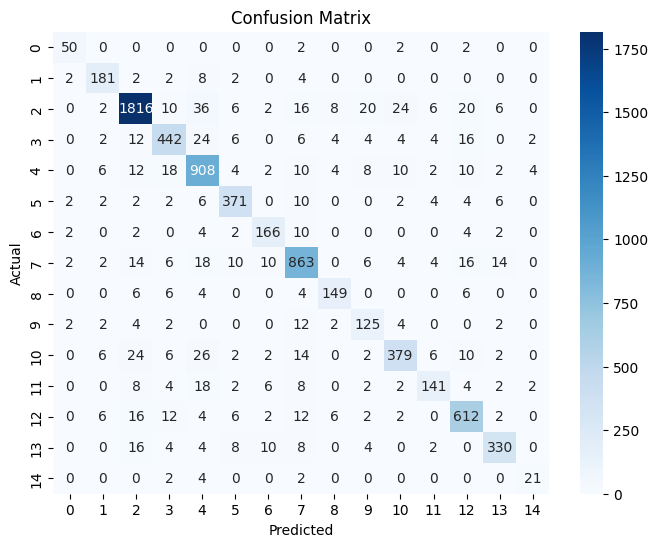

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Test seti için tahmin yapalım
y_pred = knn_imp.predict(X_test_scaled_imp)

# Karışıklık matrisi hesapla
cm = confusion_matrix(y_test, y_pred)

# Heatmap olarak görselleştir
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



In [ ]:
from sklearn.metrics import classification_report

# Sınıflandırma raporunu oluştur
report = classification_report(y_test, y_pred, target_names=[str(pos) for pos in np.unique(y_test)])

# Raporu yazdır
print(report)


              precision    recall  f1-score   support

           0       0.83      0.89      0.86        56
           1       0.87      0.90      0.88       201
           2       0.94      0.92      0.93      1972
           3       0.86      0.84      0.85       526
           4       0.85      0.91      0.88      1000
           5       0.89      0.90      0.89       411
           6       0.83      0.86      0.85       192
           7       0.88      0.89      0.89       969
           8       0.86      0.85      0.86       175
           9       0.72      0.81      0.76       155
          10       0.88      0.79      0.83       479
          11       0.83      0.71      0.77       199
          12       0.87      0.90      0.88       682
          13       0.90      0.85      0.88       386
          14       0.72      0.72      0.72        29

    accuracy                           0.88      7432
   macro avg       0.85      0.85      0.85      7432
weighted avg       0.88   

In [ ]:
import pickle

# KNN modelini kaydet
with open("mevki_tahmin_modeli.pkl", "wb") as model_file:
    pickle.dump(knn_imp, model_file)

# Label encoder'ı kaydet
with open("label_encoder.pkl", "wb") as le_file:
    pickle.dump(le, le_file)

print("KNN modeli ve Label Encoder başarıyla kaydedildi!")




KNN modeli ve Label Encoder başarıyla kaydedildi!


In [ ]:
import pandas as pd

# Model eğitimi sırasında kullandığın veriyi kaydet
df.to_csv("veri_seti.csv", index=False)


In [ ]:
import pandas as pd

# Dosyanın adını kendi kaydettiğin dosya ismiyle değiştir
df = pd.read_csv("veri_seti.csv")

# İlk birkaç satırı görüntüle
print(df.head())

# Veri türlerini kontrol et
print(df.dtypes)

# Eksik veri kontrolü
print(df.isnull().sum())

# Kategorik değişkenlerin içeriğini incele
print(df[['Position', 'League', 'Anomaly']].head())


   Position  League  Contract End   Age  Overall Score  Potential Score  \
0       413       0             1  34.0      75.000000        75.000000   
1       622       0             4  27.0      65.548256        70.849038   
2       451       0             3  34.0      73.000000        73.000000   
3      1304       0             2  37.0      73.000000        73.000000   
4        12       0             2  28.0      72.000000        72.000000   

   Height  Weight  Preferred Foot  Best Overall  ...  Shooting_Skill_diff  \
0   177.0    69.0               1          76.0  ...            14.926703   
1   174.0    65.0               1          74.0  ...             1.145597   
2   193.0    84.0               1          73.0  ...             1.988052   
3   182.0    84.0               1          73.0  ...            14.882640   
4   173.0    68.0               1          72.0  ...             8.326703   

   Passing_Skill_diff  Defensive_Skill_diff  Attacking_Skill_diff  Speed_diff  \
0    

In [ ]:
import pandas as pd

# Orijinal veri setini (Player sütunu içeren) yükle
original_df = pd.read_csv("/content/drive/MyDrive/player/all_fifa_players.csv")

# Model sonrası veri setini yükle (Player sütunu olmayan)
trained_df = pd.read_csv("/content/veri_seti.csv")

# Eğer satır sayıları eşitse, Player sütununu ekleyelim
if len(original_df) == len(trained_df):
    trained_df["Player"] = original_df["Player"]
else:
    print("⚠️ Veri setlerinde satır uyumsuzluğu var! Kontrol etmelisin.")

# Yeni veri setini kaydet
trained_df.to_csv("/content/drive/MyDrive/player/final_predictions_with_names.csv", index=False)

# Son 5 satırı göster
print(trained_df.tail())


       Position  League  Contract End   Age  Overall Score  Potential Score  \
37153       142      49             2  21.0      56.000000        67.000000   
37154       909      49             2  20.0      56.000000        69.000000   
37155       108      49             2  19.0      65.548256        70.849038   
37156       360      49             0  20.0      53.000000        62.000000   
37157       164      49             0  22.0      52.000000        62.000000   

       Height  Weight  Preferred Foot  Best Overall  ...  Passing_Skill_diff  \
37153   190.0    78.0               1          58.0  ...          -13.560006   
37154   178.0    69.0               1          56.0  ...          -10.405843   
37155   174.0    66.0               1          58.0  ...           -8.066431   
37156   182.0    73.0               0          55.0  ...          -18.537208   
37157   185.0    75.0               0          55.0  ...           -9.158275   

       Defensive_Skill_diff  Attacking_Skill

In [ ]:
import joblib

# Modeli yükle
model = joblib.load("/content/mevki_tahmin_modeli.pkl")  # Model dosyanın ismini kontrol et

# Modelin beklediği özellik sayısını gör
print("Modelin beklediği feature sayısı:", model.n_features_in_)


Modelin beklediği feature sayısı: 10


In [ ]:
print("Most important features:", important_features)


Most important features: ['Speed_diff' 'Aggression_diff' 'Attack Position_diff' 'Agility_diff'
 'Defensive_Skill_diff' 'Penalties_diff' 'Pace/Diving_diff' 'League_diff'
 'Reactions_diff' 'Total Defending_diff']
